# Projeto 1

## <font color = 'red'>Maria Clara Lorenzetti Luques</font>

#### Obs.: Para separar os dados desejados de aposentados e jovens apenas, as PNADs 2014 e 2011 foram filtradas em outro arquivo, assim não sobrecarregando este. O arquivo "P1", no qual se encontra o código de filtração e criação de novos arquivos csv, se encontra na pasta do projeto no GitHub (usuário = claraluques). Obrigada.

# Jovens ou Aposentados?

## 1-Introdução
### Aumento da expectativa de vida e independência dos jovens. Estes são dois fatores que, juntos à curiosidade, deram início à esta pesquisa. Afinal, quem participa mais da sociedade nos dias de hoje: o jovem ou o aposentado?
### Não é de hoje que os mais velho continuam trabalhando e sendo ativos na sociedade mesmo depois de pedir aposentadoria, mas será que a boa vontade deste grupo ultrapassa a dos jovens-adultos, tendo um papel maior na sociedade? Veremos, após uma intensa análise de dados fornecidos por PNADs, qual grupo participa mais e qual se desenvolveu mais nos últimos 3 anos.

## 2-Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange

def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\MLUQUES\Documents\Insper\Semestre 2\Ciência dos Dados\CD\Projeto1


In [3]:
a14 = pd.read_csv('Aposentados2014.csv', sep=',')

agen = a14.V0302 #quali
aecativ = a14.V4704 #quali
atrab = a14.V9001 #quali
anivens = a14[~a14.V4802.isnull()]
anivens = anivens.V4802

aidade = a14.V8005 #quanti
arenda = a14.V4718 #quanti
ahoras = a14.V9058 #quanti

an = a14.shape[0]

In [4]:
j14 = pd.read_csv('Jovens2014.csv', sep=',')

jgen = j14.V0302 #quali
jecativ = j14.V4704 #quali
jtrab = j14.V9001 #quali
jnivens = j14[~j14.V4802.isnull()]
jnivens = jnivens.V4802

jidade = j14.V8005 #quanti
jrenda = j14.V4718 #quanti
jhoras = j14.V9058 #quanti

jn = j14.shape[0]

In [5]:
agen = agen.astype('category')
aecativ = aecativ.astype('category')
atrab = atrab.astype('category')
anivens = anivens.astype('category')

jgen = jgen.astype('category')
jecativ = jecativ.astype('category')
jtrab = jtrab.astype('category')
jnivens = jnivens.astype('category')

In [6]:
agen.cat.categories=('Masc.', 'Fem.')
jgen.cat.categories=('Masc.', 'Fem.')
aecativ.cat.categories=('Economicamente ativo','Não economicamente ativo')
jecativ.cat.categories=('Economicamente ativo','Não economicamente ativo')
atrab.cat.categories=('Trabalhou na semana','Não trabalhou na semana')
jtrab.cat.categories=('Trabalhou na semana','Não trabalhou na semana')
anivens.cat.categories=('Alfabetização de adultos','1ª a 4ª séries (EF em 8 anos)','5ª a 8ª série (EF em 8 anos)',
                        '1ª série (EF em 9 anos)','2ª a 5ª série (EF em 9 anos)','6ª a 9ª série (EF em 9 anos)',
                               'Educação de jovens e adultos (não seriado do EF)', 'Ensino Médio (pré-vestibular incluso)',
                               'Ensino Superior (mestrado e doutorado)')
jnivens.cat.categories=('Alfabetização de adultos','1ª a 4ª séries (EF em 8 anos)','5ª a 8ª série (EF em 8 anos)',
                        '1ª série (EF em 9 anos)', '2ª a 5ª série (EF em 9 anos)','6ª a 9ª série (EF em 9 anos)',
                               'Educação de jovens e adultos (não seriado do EF)', 'Ensino Médio (pré-vestibular incluso)',
                               'Ensino Superior (mestrado e doutorado)')

In [7]:
fr_agen = (agen.value_counts()/an*100).round(decimals=1)
fr_jgen = (jgen.value_counts()/jn*100).round(decimals=1)

fr_aecativ = (aecativ.value_counts()/an*100).round(decimals=1)
fr_jecativ = (jecativ.value_counts()/jn*100).round(decimals=1)

fr_atrab = (atrab.value_counts()/an*100).round(decimals=1)
fr_jtrab = (jtrab.value_counts()/jn*100).round(decimals=1)

fr_anivens = (anivens.value_counts()/an*100).round(decimals=1)
fr_jnivens = (jnivens.value_counts()/jn*100).round(decimals=1)

fr_ahoras = (ahoras.value_counts()/an*100).round(decimals=1)
fr_jhoras = (jhoras.value_counts()/jn*100).round(decimals=1)

### Para começar, faremos uma avaliação básica de gênero e idade, tanto para aposentados quanto para jovens, para termos uma ideia de como se comportam os grupos analisados.

Número total de aposentados:
 38643


Frequêcia relativa do gênero dos aposentados:

      Masc.: 49.2 %
      Fem.: 50.8 %
      


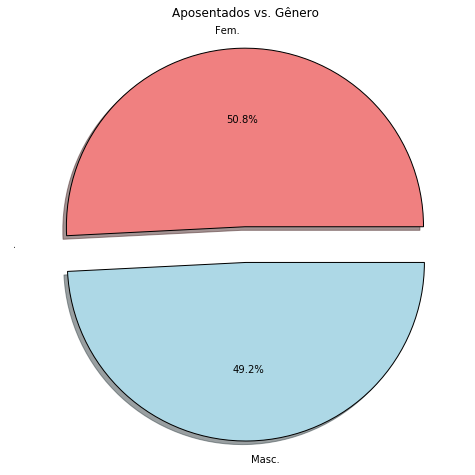

Idade dos aposentados (describe):

 count    38643.000000
mean        67.386952
std         10.574217
min         11.000000
25%         61.000000
50%         67.000000
75%         74.000000
max        112.000000
Name: V8005, dtype: float64 



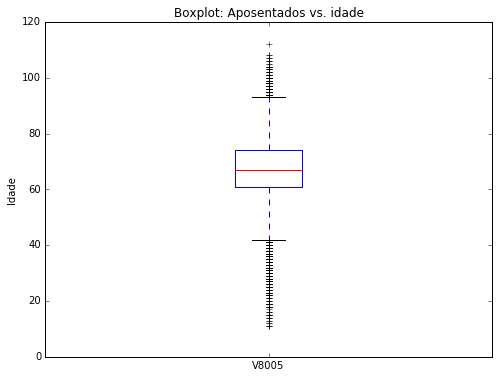

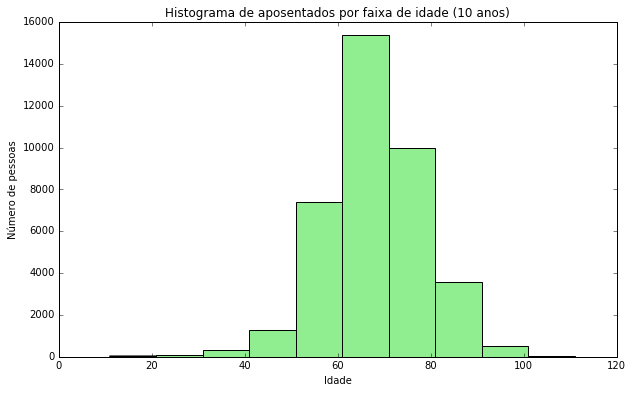

In [103]:
'''Analisando a parcela de aposentados da PNAD'''

print('''Número total de aposentados:
''', a14.shape[0])
print('''
''')
colors = ['Lightcoral','lightblue']
explode=(0.1,0.1)
fr_agen.plot(kind='pie', colors=colors, figsize=(8,8), autopct='%1.1f%%',shadow=True, explode=explode)
print('Frequêcia relativa do gênero dos aposentados:')
print('''
      Masc.: {0} %
      Fem.: {1} %
      '''.format(fr_agen[0], fr_agen[1]))
plt.title('Aposentados vs. Gênero')
plt.ylabel('.')
plt.show()

oi = aidade.describe()
print('Idade dos aposentados (describe):')
print('''
''', oi,'''
''')

f_aid = arange(11,113,10)
aidade_var = pd.cut(aidade, f_aid)

aidade.plot(kind='box',figsize=(8,6))
plt.title('Boxplot: Aposentados vs. idade')
plt.ylabel('Idade')
plt.show()

aidade.value_counts()
aidade.plot.hist(bins=f_aid, color='lightgreen', figsize=(10,6))
plt.title('Histograma de aposentados por faixa de idade (10 anos)')
plt.ylabel('Número de pessoas')
plt.xlabel('Idade')
plt.show()


Número total de jovens (16 a 23 anos):
 48225


Frequêcia relativa do gênero dos jovens:

      Masc.: 50.6 %
      Fem.: 49.4 %
      


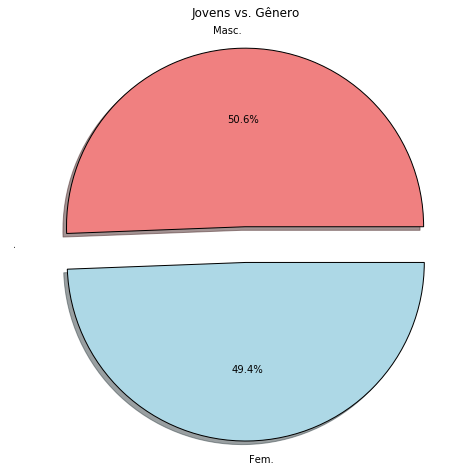

Idade dos jovens (describe):

 count    48225.000000
mean        19.386045
std          2.277445
min         16.000000
25%         17.000000
50%         19.000000
75%         21.000000
max         23.000000
Name: V8005, dtype: float64 



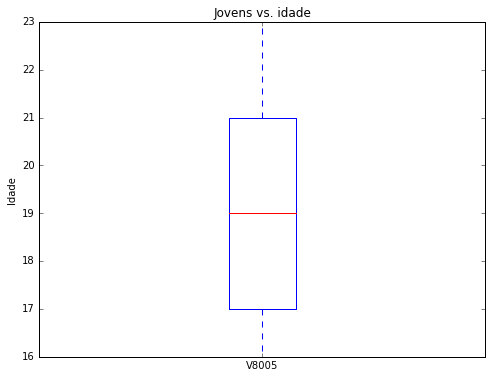

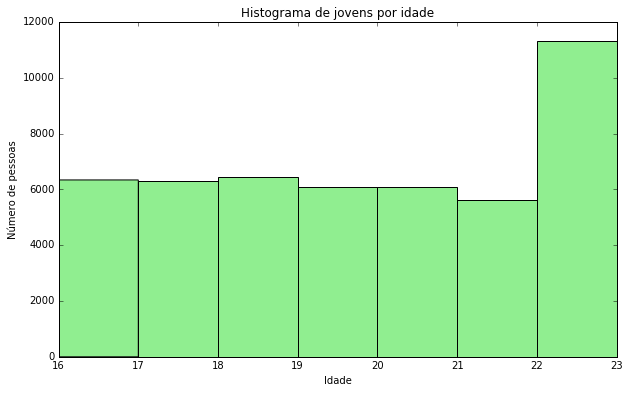

In [105]:
'''Analisando a parcela de jovens da PNAD'''

print('''Número total de jovens (16 a 23 anos):
''', j14.shape[0])
print('''
''')
colors = ['lightcoral','lightblue']
explode=(0.1,0.1)
fr_jgen.plot(kind='pie', colors=colors, figsize=(8,8), autopct='%1.1f%%',shadow=True, explode=explode)
print('Frequêcia relativa do gênero dos jovens:')
print('''
      Masc.: {0} %
      Fem.: {1} %
      '''.format(fr_jgen[0], fr_jgen[1]))
plt.title('Jovens vs. Gênero')
plt.ylabel('.')
plt.show()

print('Idade dos jovens (describe):')

oi = jidade.describe()
print('''
''', oi,'''
''')


f_jid = arange(16,24,1)
jidade_var = pd.cut(jidade, f_jid)

jidade.plot(kind='box', figsize=(8,6))
plt.title('Jovens vs. idade')
plt.ylabel('Idade')
plt.show()

jidade.value_counts()
jidade.plot.hist(bins=f_jid, color='lightgreen', figsize=(10,6))
plt.title('Histograma de jovens por idade')
plt.ylabel('Número de pessoas')
plt.xlabel('Idade')
plt.show()

### Pudemos ver que quanto ao gênero, ambos os grupos estão equilibrados, enquanto ao comparar os gráficos de idade vê-se que a idade dos aposentados se concentra entre 50 e 80 anos, e a idade dos jovens está bem equilibrada com exceção dos individuos entre 22 e 23 anos, cuja parcela é maior que as outras.
### Para esta primeira parte, é uma conclusão previsível, considerando a expectativa de vida do país e a idade média de aposentadoria (60 anos).

### Agora passaremos a analisar dados que se relacionam com as respectivas participações na sociedade. Para isso, analisaremos a frequência relativa para ambos de:
### - Trabalho;
### - Situação na economia.
### Cruzaremos então estes dados com outras variáveis criando tabelas para uma análise mais completa.

Frequêcia relativa de aposentados trabalhando:

      Não Trabalhou: 78.6 %
      Trabalhou: 21.4 %
      


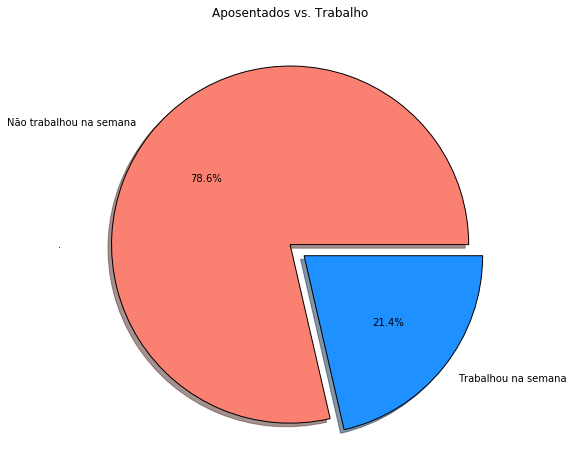

In [10]:
'''Aposentados e trabalho'''

c = ['salmon','dodgerblue']
explode = (0,0.1)
fr_atrab.plot(kind='pie', colors=c, figsize=(8,8), explode=explode, autopct='%1.1f%%',shadow=True)
print('Frequêcia relativa de aposentados trabalhando:')
print('''
      Não Trabalhou: {0} %
      Trabalhou: {1} %
      '''.format(fr_atrab[1], fr_atrab[0]))
plt.title('Aposentados vs. Trabalho')
plt.ylabel('.')
plt.show()

Frequêcia relativa de aposentados economicamente ativos:

      Econom. ativos: 73.2 %
      Não econom. ativos: 26.8 %
      


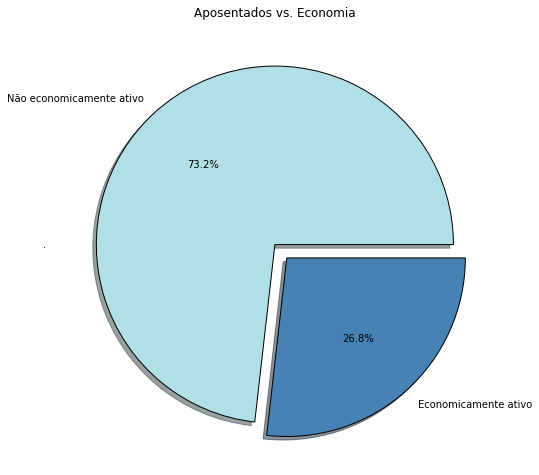

In [11]:
'''Aposentados e economia'''

c=['powderblue','steelblue']
explode = (0,0.1)
fr_aecativ.plot(kind='pie',colors=c, figsize=(8,8), explode=explode, autopct='%1.1f%%',shadow=True)
print('Frequêcia relativa de aposentados economicamente ativos:')
print('''
      Econom. ativos: {0} %
      Não econom. ativos: {1} %
      '''.format(fr_aecativ[1], fr_aecativ[0]))
plt.title('Aposentados vs. Economia')
plt.ylabel('.')
plt.show()

In [42]:
'''Situação economica vs. Idade dos aposentados'''

print('Situação econômica por faixa de idade:')
oi = pd.crosstab(aecativ,aidade_var, rownames=['Situação na economia'], colnames=['Faixa de Idade'], margins=True)
oi

Situação econômica por faixa de idade:


Faixa de Idade,"(11, 21]","(21, 31]","(31, 41]","(41, 51]","(51, 61]","(61, 71]","(71, 81]","(81, 91]","(91, 101]","(101, 111]",All
Situação na economia,,,,,,,,,,,
Economicamente ativo,2,14,66,442,3261,4664,1610,274,12,2,10347
Não economicamente ativo,40,103,303,1082,5202,10632,7624,2876,408,22,28296
All,42,117,369,1524,8463,15296,9234,3150,420,24,38643


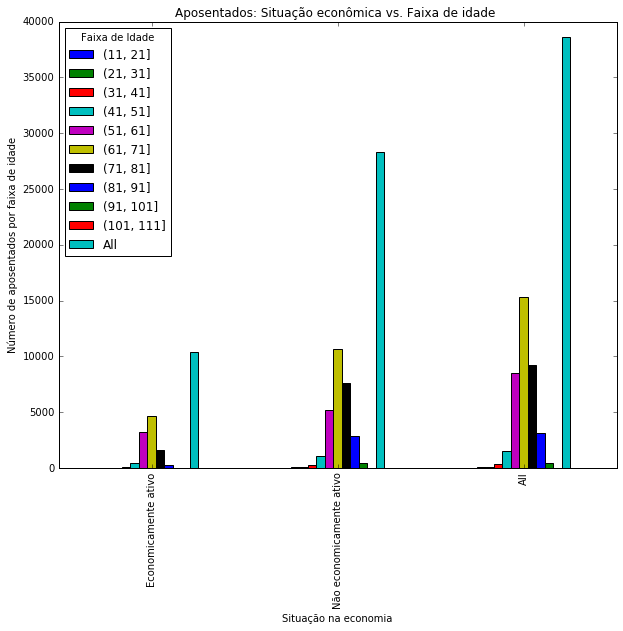

In [43]:
oi.plot(kind='bar',figsize=(10,8))
plt.ylabel('Número de aposentados por faixa de idade')
plt.title('Aposentados: Situação econômica vs. Faixa de idade ')
plt.show()

In [14]:
'''Aposentados: trabalho vs. economia'''

print ('Número de aposentados por trabalho na semana/estado econômico:')
c1 = pd.crosstab(atrab, aecativ, margins=True,rownames=['Trabalhou'], colnames=['Situação na economia'])
c1

Número de aposentados por trabalho na semana/estado econômico:


Situação na economia,Economicamente ativo,Não economicamente ativo,All
Trabalhou,,,
Trabalhou na semana,8254,0,8254
Não trabalhou na semana,2093,28296,30389
All,10347,28296,38643


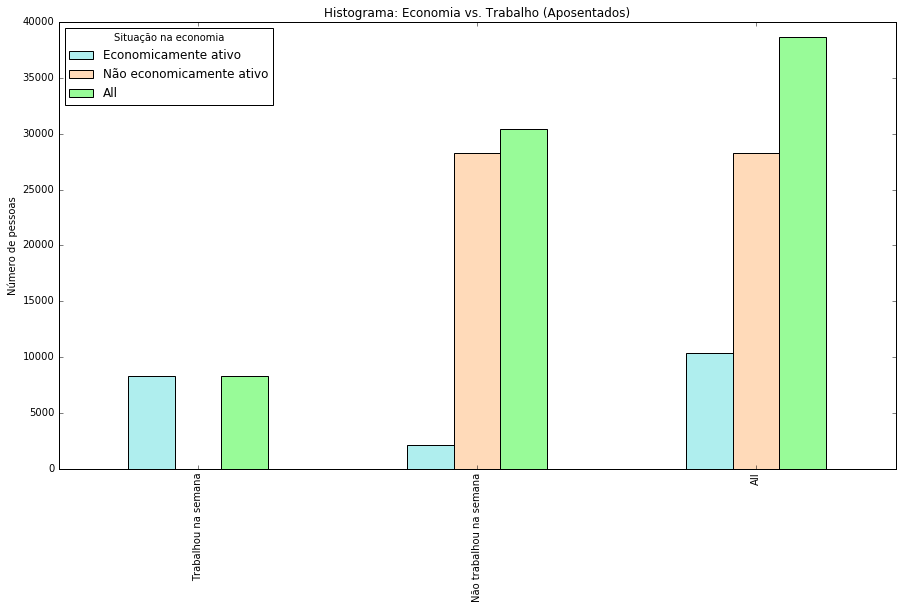

In [15]:
c = ['paleturquoise', 'peachpuff','palegreen']
c1.plot(kind='bar',color=c, figsize=(15,8))
plt.ylabel('Número de pessoas')
plt.title('Histograma: Economia vs. Trabalho (Aposentados)')
plt.xlabel(' ')
plt.show()

### <font color ='green'>Considerando que não seria justo comparar a frequencia relativa dos aposentados que trabalham com o número geral destes, já que muitos aposentados realmente não trabalham mais, analisaremos a frequência de aposentados que são ECONOMICAMENTE ATIVOS em relação ao trabalho.

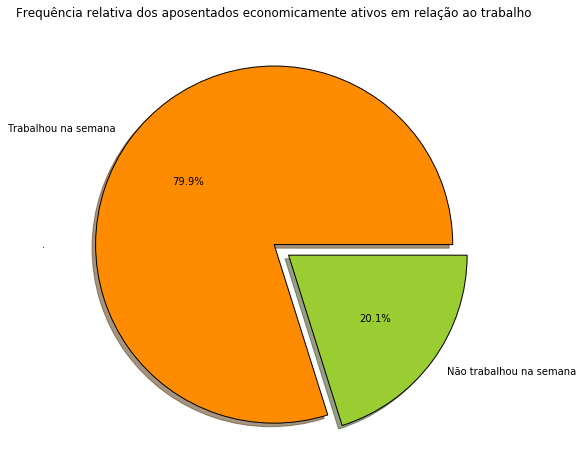

In [16]:
aectrab = atrab[(aecativ=='Economicamente ativo')]
fr_aectrab = (aectrab.value_counts()/an*100).round(decimals=1)

c=['darkorange','yellowgreen']
explode = (0,0.1)
fr_aectrab.plot(kind='pie',colors=c, figsize=(8,8), explode=explode, autopct='%1.1f%%',shadow=True)
plt.ylabel('.')
plt.title('Frequência relativa dos aposentados economicamente ativos em relação ao trabalho', fontsize='large')
plt.show()

Frequêcia relativa de jovens trabalhando:

      Não Trabalhou: 51.2 %
      Trabalhou: 48.8 %
      


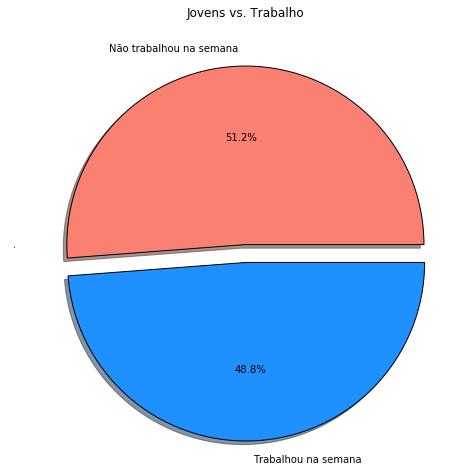

In [17]:
'''Jovens e trabalho'''

c = ['salmon','dodgerblue']
explode = (0,0.1)
fr_jtrab.plot(kind='pie', colors=c, figsize=(8,8), explode=explode, autopct='%1.1f%%',shadow=True)
print('Frequêcia relativa de jovens trabalhando:')
print('''
      Não Trabalhou: {0} %
      Trabalhou: {1} %
      '''.format(fr_jtrab[1], fr_jtrab[0]))
plt.title('Jovens vs. Trabalho')
plt.ylabel('.')
plt.show()

Frequêcia relativa de jovens economicamente ativos:

      Econom. ativos: 39.1 %
      Não econom. ativos: 60.9 %
      


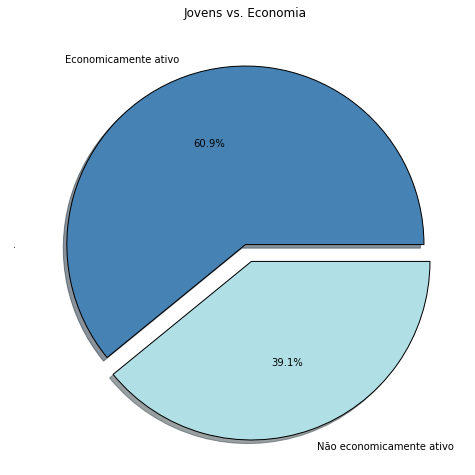

In [18]:
'''Jovens e economia'''

c=['steelblue','powderblue']
explode = (0,0.1)
fr_jecativ.plot(kind='pie',colors=c, figsize=(8,8), explode=explode, autopct='%1.1f%%',shadow=True)
print('Frequêcia relativa de jovens economicamente ativos:')
print('''
      Econom. ativos: {0} %
      Não econom. ativos: {1} %
      '''.format(fr_jecativ[1], fr_jecativ[0]))
plt.title('Jovens vs. Economia')
plt.ylabel('.')
plt.show()

In [19]:
'''Situação economica vs. Idade dos jovens'''

print('Situação econômica por idade:')
oi = pd.crosstab(jecativ,jidade, rownames=['Situação na economia'], colnames=['Idade'], margins=True)
oi

Situação econômica por idade:


Idade,16,17,18,19,20,21,22,23,All
Situação na economia,,,,,,,,,
Economicamente ativo,1898,2625,3636,4050,4283,4168,4500,4215,29375
Não economicamente ativo,4441,3691,2822,2044,1793,1448,1388,1223,18850
All,6339,6316,6458,6094,6076,5616,5888,5438,48225


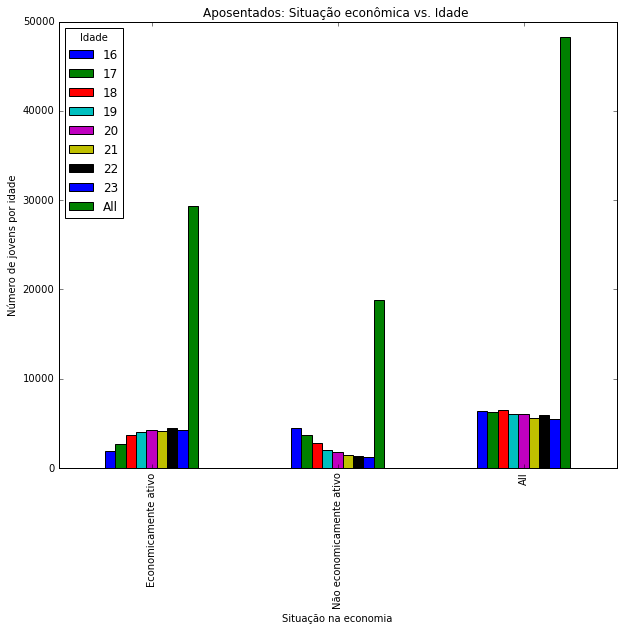

In [20]:
oi.plot(kind='bar',figsize=(10,8))
plt.ylabel('Número de jovens por idade')
plt.title('Aposentados: Situação econômica vs. Idade ')
plt.show()

In [21]:
'''Jovens: trabalho vs. economia'''

print ('Número de jovens por trabalho na semana/estado econômico:')
c2 = pd.crosstab(jtrab, jecativ, margins=True,rownames=['Trabalhou'],colnames=['Situação na economia'])
c2

Número de jovens por trabalho na semana/estado econômico:


Situação na economia,Economicamente ativo,Não economicamente ativo,All
Trabalhou,,,
Trabalhou na semana,23530,0,23530
Não trabalhou na semana,5845,18850,24695
All,29375,18850,48225


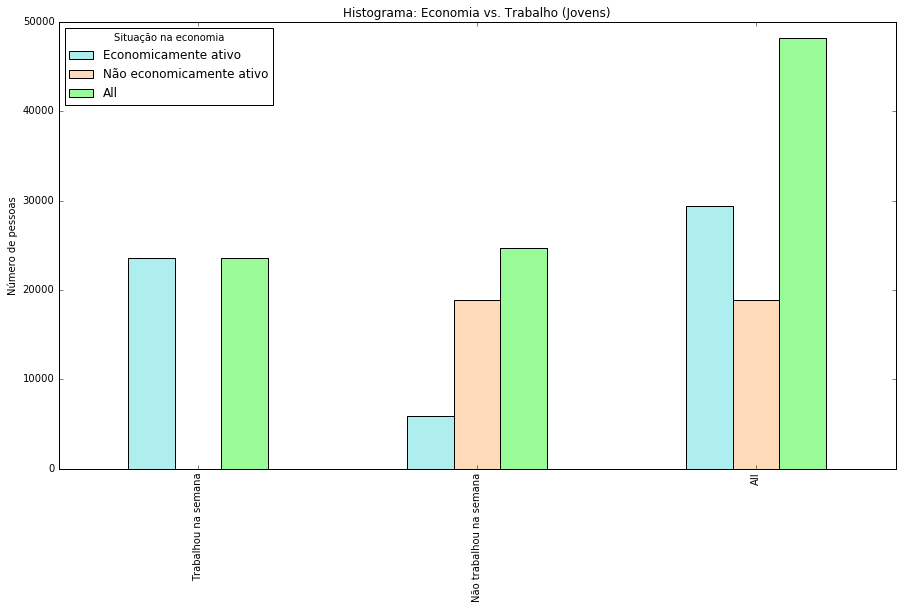

In [22]:
c = ['paleturquoise', 'peachpuff','palegreen']
c2.plot(kind='bar',color=c, figsize=(15,8))
plt.ylabel('Número de pessoas')
plt.xlabel(' ')
plt.title('Histograma: Economia vs. Trabalho (Jovens)')
plt.show()

### <font color = 'green'>Do mesmo jeito que usamos a frequencia apenas dos economicamente ativos para os aposentados, faremos isso também para os jovens.

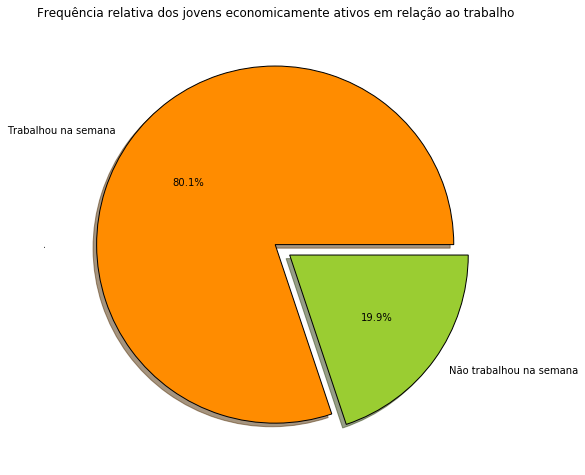

In [23]:
jectrab = jtrab[(jecativ=='Economicamente ativo')]
fr_jectrab = (jectrab.value_counts()/jn*100).round(decimals=1)

c=['darkorange','yellowgreen']
explode = (0,0.1)
fr_jectrab.plot(kind='pie',colors=c, figsize=(8,8), explode=explode, autopct='%1.1f%%',shadow=True)
plt.ylabel('.')
plt.title('Frequência relativa dos jovens economicamente ativos em relação ao trabalho', fontsize='large')
plt.show()

## A) Primeira Comparação

### Temos que, segundo os dois gráficos abaixo, a porcentagem de jovens e aposentados, economicamente ativos, que trabalharam na semana de referência da pesquisa é muito próxima. Os jovens ficam a frente com 0,2% de seus econom. ativos trabalhando.

<img src="aectrab.jpg"/, width=420, height=350 align='left'>
<img src="jectrab.jpg"/, width=420, height=350 align='right'>

### Continuando nossa análise, iremos agora partir para variáveis mais complexas, que analisarão o salário recebido por estes trabalhadores deifinidos na conclusão acima, as horas de trabalho semanais, e também o nível de ensino dos individuos analisados.

In [106]:
'''Separando a renda dos aposentados economicamente ativos que trabalham'''

teste = a14[(~a14.V4718.isnull())]
arenda = teste.V4718[(teste.V4718>0)&(teste.V4718<=100000)]

far = arange(0,50001,10000)

arendaf = pd.cut(arenda, far)
x = arendaf.value_counts()
y = arenda.describe()

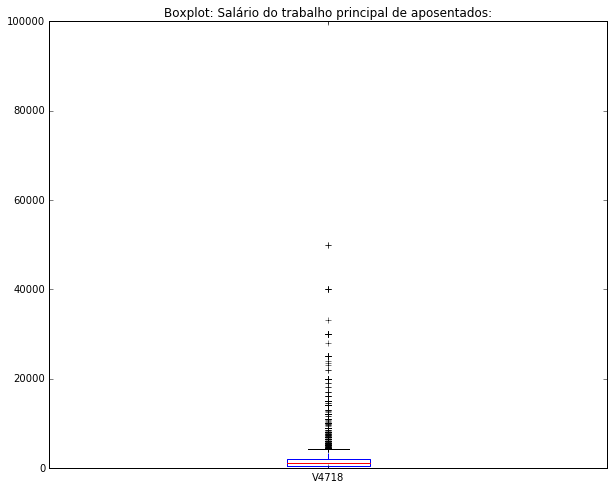



Número de aposentados por faixa de renda:
 (0, 10000]        6533
(10000, 20000]     152
(20000, 30000]      23
(30000, 40000]       6
(40000, 50000]       2
dtype: int64 
 
 Renda dos aposentados (describe):
 count      6717.000000
mean       2109.827602
std        3601.249338
min           1.000000
25%         500.000000
50%        1000.000000
75%        2000.000000
max      100000.000000
Name: V4718, dtype: float64


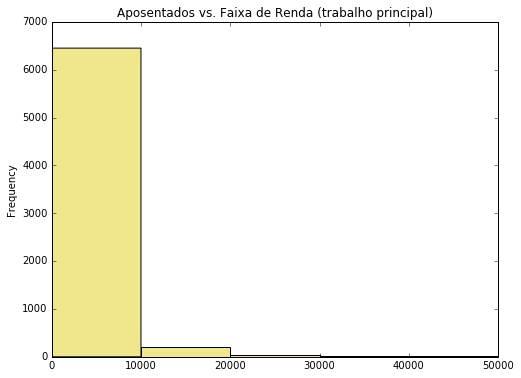

*Um valor entre 90.000 e 100.000 reais foi excluido por ser considerado irrelevante.


In [112]:
arenda.plot(kind='box', figsize=(10,8))
plt.title('Boxplot: Salário do trabalho principal de aposentados:')
plt.show()

print('''
''')


print('''Número de aposentados por faixa de renda:
''',
      x, '''
''', '''
''', '''Renda dos aposentados (describe):
'''
      
      , 
      y)
arenda.plot.hist(bins=far, color='khaki', figsize=(8,6))
plt.title('Aposentados vs. Faixa de Renda (trabalho principal)')
plt.show()
print('*Um valor entre 90.000 e 100.000 reais foi excluido por ser considerado irrelevante.')

In [113]:
'''Separando a renda dos jovens economicamente ativos que trabalham'''

teste = j14[(~j14.V4718.isnull())]
jrenda = teste.V4718[teste.V4718<=25000]

fjr = arange(0,16001,2000)

jrendaf = pd.cut(jrenda, fjr)

x = jrendaf.value_counts()
y = jrenda.describe()

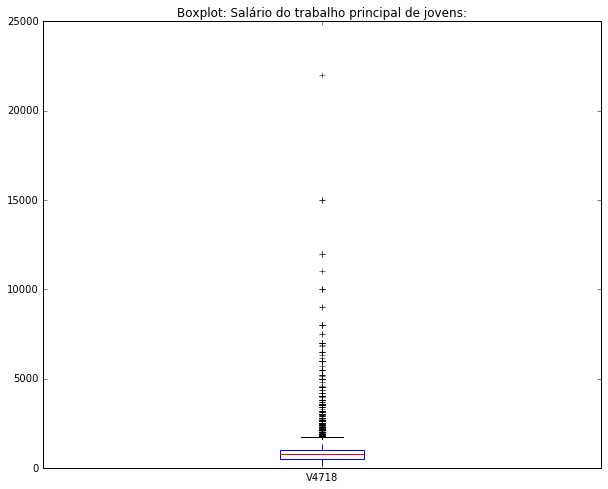



Número de jovens por faixa de renda:
 (0, 2000]         21235
(2000, 4000]        525
(4000, 6000]         55
(6000, 8000]         20
(8000, 10000]         5
(10000, 12000]        3
(14000, 16000]        2
(12000, 14000]        0
dtype: int64 
 
 Renda dos aposentados (describe):
 count    23817.000000
mean       836.110005
std        650.419382
min          0.000000
25%        500.000000
50%        750.000000
75%       1000.000000
max      22000.000000
Name: V4718, dtype: float64


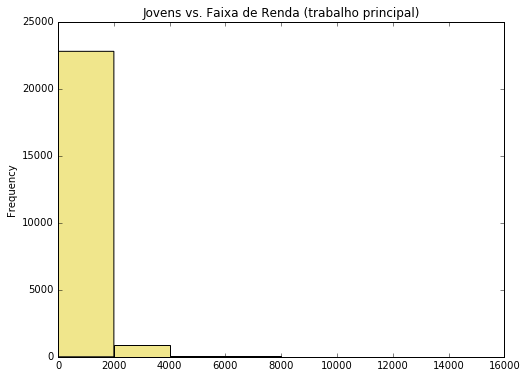

*Um valor entre 20.000 e 22.000 reais foi excluido por ser considerado irrelevante.


In [115]:
jrenda.plot(kind='box', figsize=(10,8))
plt.title('Boxplot: Salário do trabalho principal de jovens:')
plt.show()

print('''
''')


print('''Número de jovens por faixa de renda:
''',
      x, '''
''', '''
''', '''Renda dos aposentados (describe):
'''
      
      , 
      y)
jrenda.plot.hist(bins=fjr, color='khaki', figsize=(8,6))
plt.title('Jovens vs. Faixa de Renda (trabalho principal)')
plt.show()
print('*Um valor entre 20.000 e 22.000 reais foi excluido por ser considerado irrelevante.')

## B) Segunda Comparação
### Vemos nos gráficos, e principalemente no "describe" de cada uma das parcelas, que, por mais que os jovens tenham uma parcela maior de pessoas trabalhando, os aposentados na média ganham salários maiores, já que sua mediana é maior que a mediana dos jovens.

### Aposentados: mediana = 1000;
### Jovens: mediana = 750.

In [28]:
'''Separando as horas trabalhadas por semana dos aposentados'''

teste = a14[(~a14.V9058.isnull())]
ahoras = teste.V9058[teste.V9058<=98]

fah = arange(0,99,10)

ahorasf = pd.cut(ahoras, fah)

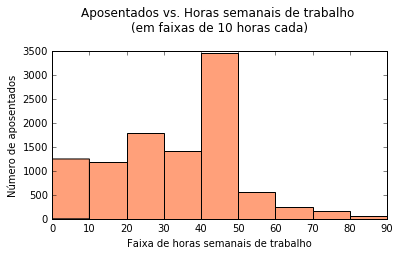

In [29]:
ahoras.plot.hist(bins=fah, color='lightsalmon', figsize=(6,3))
plt.ylabel('Número de aposentados')
plt.xlabel('Faixa de horas semanais de trabalho')
plt.title('''Aposentados vs. Horas semanais de trabalho 
(em faixas de 10 horas cada)
''')
plt.show()

In [30]:
'''Separando as horas trabalhadas por semana dos jovens'''

teste = j14[(~j14.V9058.isnull())]
jhoras = teste.V9058[teste.V9058<=98]

fjh = arange(0,99,10)

jhorasf = pd.cut(jhoras, fjh)

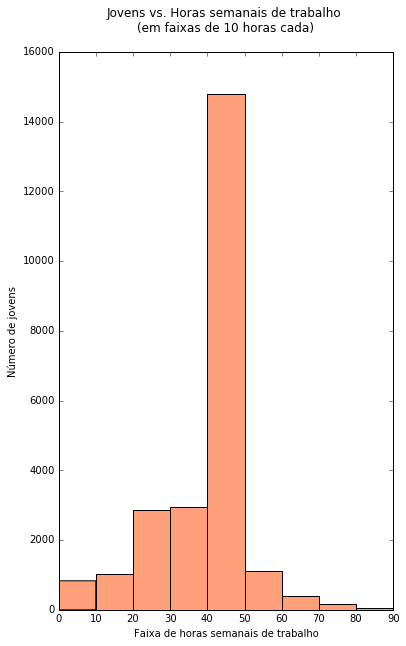

In [31]:
jhoras.plot.hist(bins=fjh, color='lightsalmon', figsize=(6,10))
plt.ylabel('Número de jovens')
plt.xlabel('Faixa de horas semanais de trabalho')
plt.title('''Jovens vs. Horas semanais de trabalho 
(em faixas de 10 horas cada)
''')
plt.show()

In [44]:
'''Horas semanais por idade de aposentados'''

print('Aposentados: Idade vs. Horas semanais:')
oi = pd.crosstab(ahorasf,aidade_var,margins=True,colnames=['Idade'],rownames=['Horas semanais'])
oi

Aposentados: Idade vs. Horas semanais:


Idade,"(11, 21]","(21, 31]","(31, 41]","(41, 51]","(51, 61]","(61, 71]","(71, 81]","(81, 91]","(91, 101]","(101, 111]",All
Horas semanais,,,,,,,,,,,
"(0, 10]",0,3,8,43,408,694,384,82,3,1,1626
"(10, 20]",1,1,7,51,473,851,343,61,3,0,1791
"(20, 30]",0,2,11,54,531,794,304,56,0,1,1753
"(30, 40]",0,2,17,122,845,1148,297,41,4,0,2476
"(40, 50]",0,4,12,122,701,776,183,17,1,0,1816
"(50, 60]",0,1,6,19,140,194,48,8,1,0,417
"(60, 70]",0,0,0,6,49,85,24,2,0,0,166
"(70, 80]",0,0,0,2,19,37,9,1,0,0,68
"(80, 90]",0,0,0,2,19,20,3,0,0,0,44


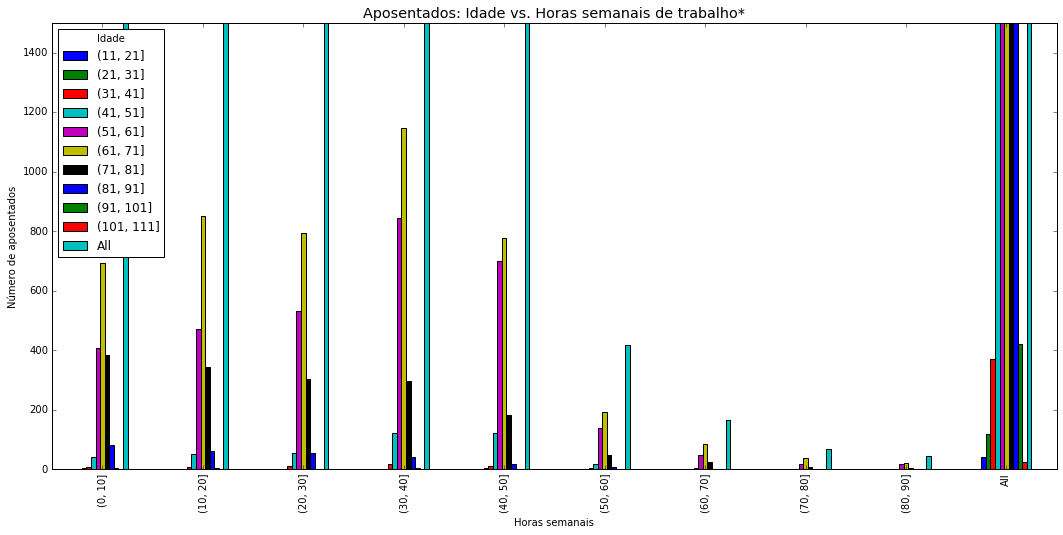

*Os valores totais ("all") no gráfico foram cortados para melhor visualização da distribuição 
      de aposentados por horas semanais.


In [45]:
oi.plot(kind='bar', figsize=(18,8))
axes=plt.gca()
axes.set_ylim([0,1500])
plt.title('Aposentados: Idade vs. Horas semanais de trabalho*', fontsize=('x-large'))
plt.ylabel('Número de aposentados')
plt.show()
print('''*Os valores totais ("all") no gráfico foram cortados para melhor visualização da distribuição 
      de aposentados por horas semanais.''')

In [34]:
'''Horas semanais por idade de jovens'''

print('Jovens: Idade vs. Horas semanais:')
oi = pd.crosstab(jhorasf,jidade,margins=True,colnames=['Idade'],rownames=['Horas semanais'])
oi

Jovens: Idade vs. Horas semanais:


Idade,16,17,18,19,20,21,22,23,All
Horas semanais,,,,,,,,,
"(0, 10]",169,139,131,136,111,122,137,108,1053
"(10, 20]",390,476,357,306,300,266,264,267,2626
"(20, 30]",303,357,403,327,348,346,353,347,2784
"(30, 40]",265,470,802,1039,1224,1189,1371,1361,7721
"(40, 50]",242,477,956,1290,1400,1445,1552,1477,8839
"(50, 60]",23,46,98,127,125,137,135,135,826
"(60, 70]",6,8,23,22,18,28,33,28,166
"(70, 80]",3,4,12,10,18,13,25,12,97
"(80, 90]",1,1,1,3,5,8,7,10,36


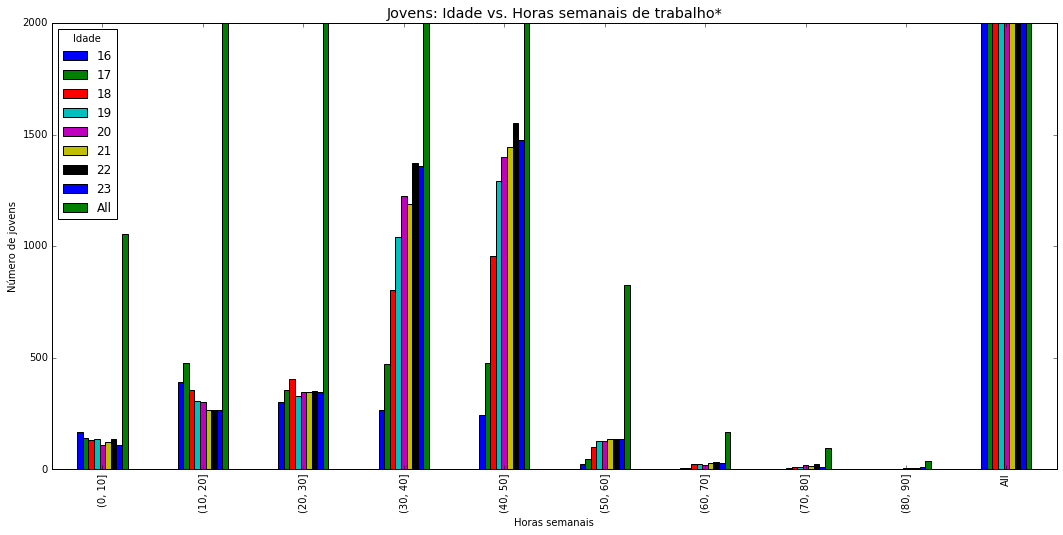

*Os valores totais ("all") no gráfico foram cortados para melhor visualização da distribuição 
      de jovens por horas semanais.


In [35]:
oi.plot(kind='bar', figsize=(18,8))
axes=plt.gca()
axes.set_ylim([0,2000])
plt.title('Jovens: Idade vs. Horas semanais de trabalho*', fontsize=('x-large'))
plt.ylabel('Número de jovens')
plt.show()
print('''*Os valores totais ("all") no gráfico foram cortados para melhor visualização da distribuição 
      de jovens por horas semanais.''')

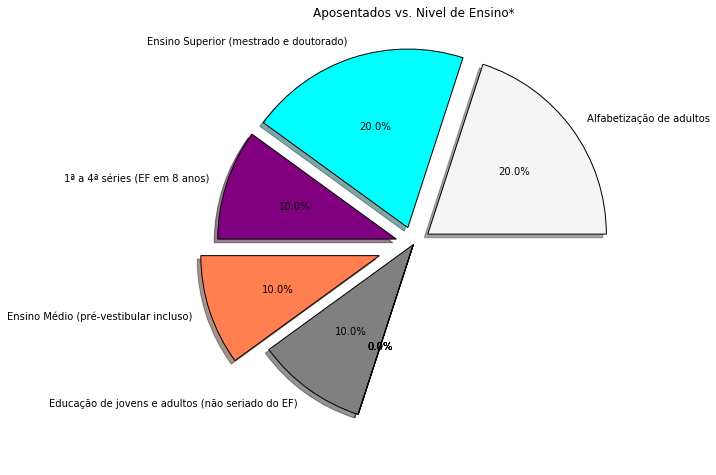

*A parte "faltando" do gráfico são as variaveis "NaN" que foram retiradas


In [83]:
'''Analisando nivel de ensino aposentados'''

c = ['whitesmoke','aqua','purple','coral','gray']
explode=(0.1,0.1,0.1,0.2,0,0,0,0,0)
fr_anivens.plot(kind='pie', colors=c, figsize=(8,8), shadow=True, autopct='%1.1f%%',explode=explode)
plt.ylabel(' ')
plt.title('Aposentados vs. Nivel de Ensino*')
plt.show()
print('*A parte "faltando" do gráfico são as variaveis "NaN" que foram retiradas')

In [101]:
'''Comparando nivel de ensino com renda'''

print('Aposentados: nivel de ensino vs. renda:')
oi = pd.crosstab(arendaf, anivens,colnames=['Nivel de ensino'], rownames=['Renda'])
oi

Aposentados: nivel de ensino vs. renda:


Nivel de ensino,Alfabetização de adultos,1ª a 4ª séries (EF em 8 anos),5ª a 8ª série (EF em 8 anos),1ª série (EF em 9 anos),2ª a 5ª série (EF em 9 anos),6ª a 9ª série (EF em 9 anos),Educação de jovens e adultos (não seriado do EF),Ensino Médio (pré-vestibular incluso),Ensino Superior (mestrado e doutorado)
Renda,,,,,,,,,
"(0, 10000]",16,8,4,0,0,0,2,5,29
"(10000, 20000]",0,0,0,0,0,0,0,0,2
"(20000, 30000]",0,0,0,0,0,0,0,0,0
"(30000, 40000]",0,0,0,0,0,0,0,0,0
"(40000, 50000]",0,0,0,0,0,0,0,0,0


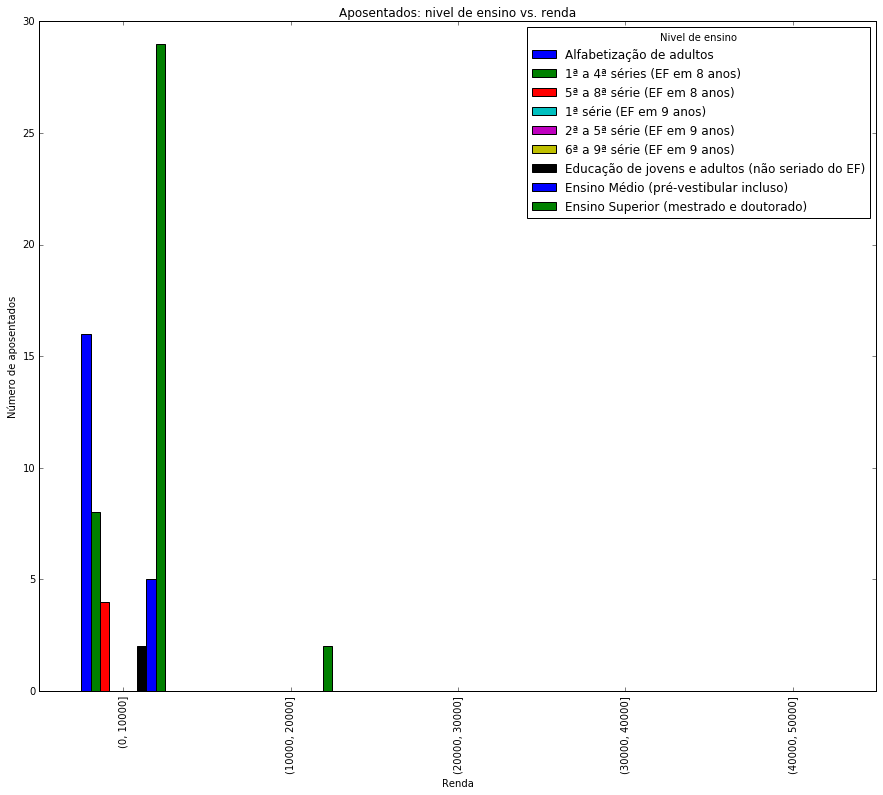

In [102]:
oi.plot(kind='bar', figsize=(15,12))
axes=plt.gca()
axes.set_ylim(0,30)
plt.ylabel('Número de aposentados')
plt.title('Aposentados: nivel de ensino vs. renda')
plt.show()

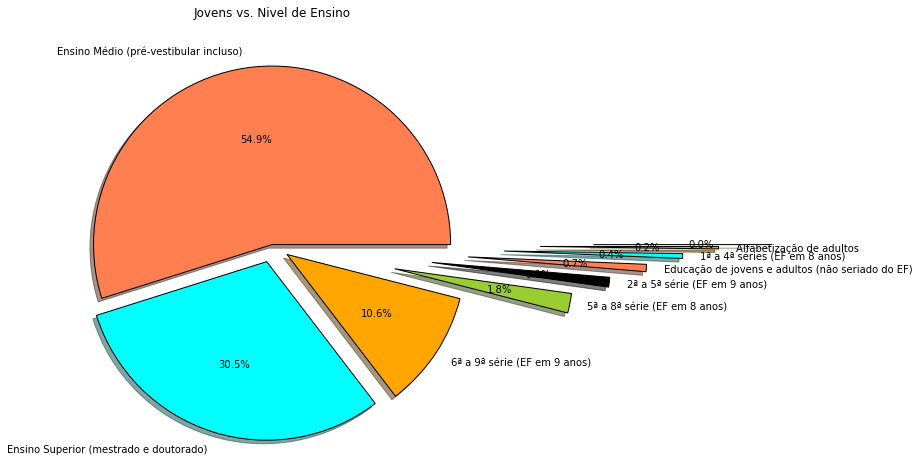

*A parte "faltando" do gráfico são as variaveis "NaN" que foram retiradas


In [87]:
'''Analisando nivel de ensino jovens'''

c = ['coral','aqua','orange','yellowgreen','black']
explode=(0,0.1,0.1,0.7,0.9,1.1,1.3,1.5,1.8)
fr_jnivens.plot(kind='pie', colors=c, figsize=(8,8), shadow=True, autopct='%1.1f%%', explode=explode)
plt.ylabel(' ')
plt.title('Jovens vs. Nivel de Ensino')
plt.show()
print('*A parte "faltando" do gráfico são as variaveis "NaN" que foram retiradas')

In [88]:
'''Comparando nivel de ensino com renda'''

print('Jovems: nivel de ensino vs. renda:')

oi = pd.crosstab(jrendaf, jnivens,colnames=['Nivel de ensino'], rownames=['Renda'])
oi

Jovems: nivel de ensino vs. renda:


Nivel de ensino,Alfabetização de adultos,1ª a 4ª séries (EF em 8 anos),5ª a 8ª série (EF em 8 anos),1ª série (EF em 9 anos),2ª a 5ª série (EF em 9 anos),6ª a 9ª série (EF em 9 anos),Educação de jovens e adultos (não seriado do EF),Ensino Médio (pré-vestibular incluso),Ensino Superior (mestrado e doutorado)
Renda,,,,,,,,,
"(0, 2000]",10,19,109,2,31,389,55,2992,2972
"(2000, 4000]",0,0,0,0,0,0,0,13,127
"(4000, 6000]",0,0,0,0,0,0,0,2,15
"(6000, 8000]",0,0,0,0,0,0,0,0,5
"(8000, 10000]",0,0,0,0,0,0,0,1,0
"(10000, 12000]",0,0,0,0,0,0,0,0,1
"(12000, 14000]",0,0,0,0,0,0,0,0,0
"(14000, 16000]",0,0,0,0,0,0,0,0,0


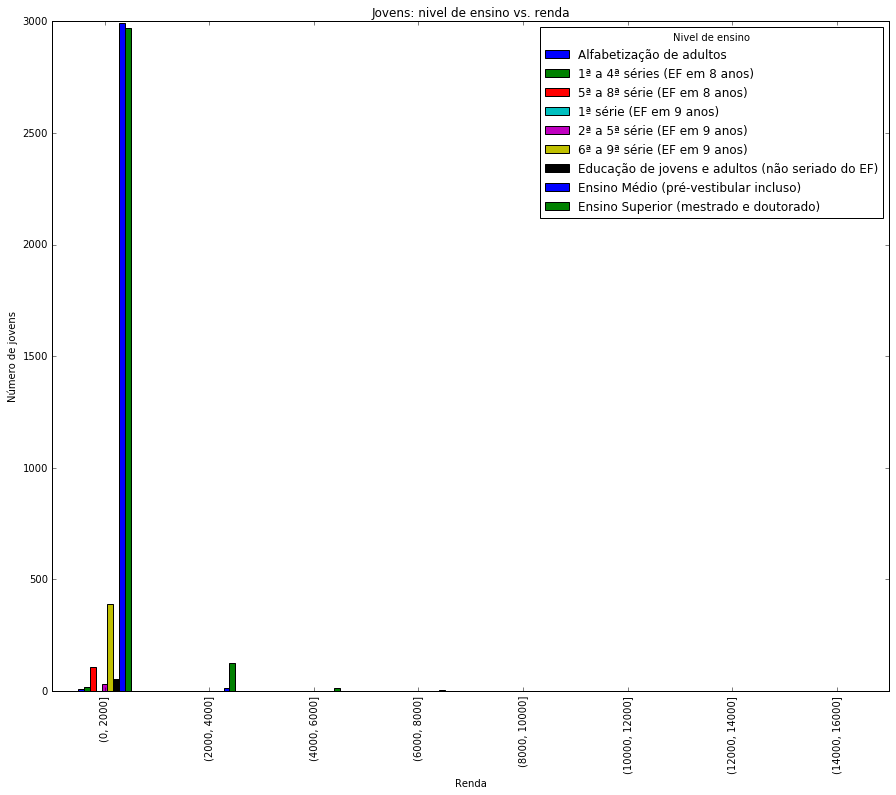

In [100]:
oi.plot(kind='bar', figsize=(15,12))
axes=plt.gca()
axes.set_ylim(0,3000)
plt.ylabel('Número de jovens')
plt.title('Jovens: nivel de ensino vs. renda')
plt.show()